## Training target model


### Introduction

1. Pull the latest version of repository - to see, which models were already chosen by others.
2. Install new `requirements.txt`. It should work with python 3.12 and upgraded pip. It contains cuda tensrflow version. If you have problems with installation, try with `requirements-no-gpu.txt`.
3. Check, if tensorflow sees your graphics card.


In [ ]:
# Source - https://stackoverflow.com/a
# Posted by Wilmar van Ommeren, modified by community. See post 'Timeline' for change history
# Retrieved 2026-01-18, License - CC BY-SA 4.0

import tensorflow as tf
tf.config.list_physical_devices('GPU')

it should return something like:

```
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
```

4. Running model involves preparing GPU, downloading data and running appropriate training. Everything is described below.
5. And don't forget to push your name next to chosen model to repository!


#### Use the whole VRAM

Set VRAM size accoring to your GPU!!


In [ ]:
from trainer.clipping_model import tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, False)
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=6000)] # Limit to 6000 MB of VRAM - TODO: adjust based on your GPU
        )
    except RuntimeError as e:
        print(e)

### Loading data and training model


Model training subsections are divided by grid density. Choose one model training subsection and then please clear cell outputs, **ADD your name in chosen model section header** and push this change on the repository. This should help us avoid conflicts, that 2 people will choose the same model.

So the header sholud like this:

```markdown
##### **GRZEGORZ** 1. Model - shallowed unet 256x256, grid density 1 m
```

#### trainer.random_fit_from_files() arguments

At the moment `epoch_steps` and `epochs` are set to 1. Run it and check, how long does it take to execute it. Then adjust these values to the amout of time you have. `epoch_steps` over 200 probably doesn't make sense, so later on increase just `epochs`.

If it lasts over 15 minutes, it means that probably there is some problem with graphics card. Nevertheless, it should run properly. Model is dumped to a different the file after each training and starts from the last checkpoint everytime, so don't hesitate to run it multiple times, if you want/have time to do it.


In [5]:
import os

data_dir = os.path.join("grids", "with-is-residential")

#### Grid density 1m


##### Downloading cities


If you have limited disk space, you can adjust `random_cities_count` variable, to download less city grids. It will save time and disk space, but will probably affect model training.
If you do this, please write somewhere down, which cities where used to train model - it will help when writing report.

> **Note:** It lasts for a while - for Częstochowa it is up to 20 minutes


In [ ]:
import random
from scraper.data_loader import DataLoader
from trainer.model import Model
from trainer.trainer import Trainer
import os
from pathlib import Path

random_cities_count = 11

folder_path = Path(data_dir)
folder_path.mkdir(parents=True, exist_ok=True)


# Prefered cities to download
cities = [
    ("Gdańsk, Polska", 466630),
    ("Bydgoszcz, Polska", 358928),
    ("Lublin, Polska", 339433),
    ("Gdynia, Polska", 246635),
    ("Radom, Polska", 214000),
    ("Toruń, Polska", 202074),
    ("Świętochłowice, Polska", 55_000),
    ("Koszalin, Polska", 108_000),
    ("Mielec, Polska", 59_000),
    ("Chorzów, Polska", 110_000),
    ("Rybnik, Polska", 140_000)
]

# List of Polish cities with population between 50,000 and 500,000
# cities = [
#     # ("Warsaw, Polska", 1790658),
#     # ("Kraków, Polska", 780981),
#     # ("Łódź, Polska", 687702),
#     # ("Wrocław, Polska", 640648),
#     # ("Poznań, Polska", 538633),
#     # ("Gdańsk, Polska", 466630),
#     ("Szczecin, Polska", 402465),
#     # ("Bydgoszcz, Polska", 358928),
#     ("Lublin, Polska", 339433),
#     ("Białystok, Polska", 297459),
#     ("Katowice, Polska", 294510),
#     # ("Gdynia, Polska", 246635),
#     ("Częstochowa, Polska", 224000),
#     ("Radom, Polska", 214000),
#     ("Toruń, Polska", 202074),
#     ("Kielce, Polska", 200000),
#     ("Rzeszów, Polska", 196000),
#     ("Opole, Polska", 128000),
#     ("Gliwice, Polska", 180000),
#     ("Zabrze, Polska", 170000),
#     ("Elbląg, Polska", 120000),
#     ("Płock, Polska", 120000),
#     ("Nowy Sącz, Polska", 85_000),
#     ("Słupsk, Polska", 91_000),
#     # ("Świętochłowice, Polska", 55_000),
#     ("Jelenia Góra, Polska", 79_000),
#     ("Stalowa Wola, Polska", 75_000),
#     # ("Koszalin, Polska", 108_000),
#     ("Mielec, Polska", 59_000),
#     ("Legnica, Polska", 100_000),
#     ("Tychy, Polska", 130_000),
#     ("Chorzów, Polska", 110_000),
#     # ("Rybnik, Polska", 140_000)
# ]

# Randomly select 8 cities
random_cities = random.sample(cities, random_cities_count)

loader = DataLoader(1, 5000, 5000, data_dir=data_dir)
managers = []
files = []

for city, population in random_cities:
    file_name = city.replace(", ", "-") + ".city_grid"
    print(f"Loading grid of city: {city} to {os.path.join(data_dir, file_name)}")
    manager = loader.load_city_grid(city,file_name)
    files.append(file_name)
    managers.append(manager)
    loader.add_elevation_to_grid(manager)
    loader.add_residential_to_grid(manager)

ModuleNotFoundError: No module named 'geopy'

##### **GRZEGORZ** 1. Model - shallowed unet 256x256, grid density 1 m


In [6]:
import os
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer
from pathlib import Path
from grid_manager import GridManager

model = ClippingModel(      # Define the model
    ClipModels.SHALLOWED_UNET,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=256,          # size of the clipping (input to the model)
    clipping_surplus=64,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path=os.path.join("models", "shallowed_unet_256_1m")     # where to save the model
)

folder = Path(data_dir)
files = [GridManager(f.name, data_dir=data_dir) for f in folder.iterdir() if f.is_file()]
print(f"files: {files}")

trainer = Trainer(          # Initialize the trainer with the model and data files
    model=model,                # the model defined above
    files=files
)

Starting from file: models/shallowed_unet_256_1m/1768874128_model.keras
files: [<grid_manager.GridManager object at 0x7fd0cbaf3650>, <grid_manager.GridManager object at 0x7fd0c85e8530>, <grid_manager.GridManager object at 0x7fd0c87973e0>, <grid_manager.GridManager object at 0x7fd0c8301490>, <grid_manager.GridManager object at 0x7fd0c873dd00>, <grid_manager.GridManager object at 0x7fd0c8314b30>, <grid_manager.GridManager object at 0x7fd0c8644470>, <grid_manager.GridManager object at 0x7fd0c8485a00>, <grid_manager.GridManager object at 0x7fd0c85eba40>, <grid_manager.GridManager object at 0x7fd0c857ddf0>, <grid_manager.GridManager object at 0x7fd0c87a3380>]


In [ ]:
trainer.random_fit_from_files(  # Train the model with random data from files
    epochs=1,                       # number of epochs to train
    steps_per_epoch=50,             # number of steps per epoch
    batch_size=8                   # size of each training batch
)
# after measuring step duration, adjust steps_per_epoch (max. around 200) and epochs to the amout of time you have

##### 2. Model unet 256x256, grid density 1 m


In [ ]:
import os
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer
from pathlib import Path

model = ClippingModel(      # Define the model
    ClipModels.UNET,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=256,          # size of the clipping (input to the model)
    clipping_surplus=64,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path=os.path.join("models", "unet_256_1m")     # where to save the model
)

folder = Path(data_dir)
files = [GridManager(f.name, data_dir=data_dir) for f in folder.iterdir() if f.is_file()]
print(f"files: {files}")

trainer = Trainer(          # Initialize the trainer with the model and data files
    model=model,                # the model defined above
    files=files
)

In [ ]:
trainer.random_fit_from_files(  # Train the model with random data from files
    epochs=1,                       # number of epochs to train
    steps_per_epoch=1,             # number of steps per epoch
    batch_size=8                   # size of each training batch
)
# after measuring step duration, adjust steps_per_epoch (max. around 200) and epochs to the amout of time you have

##### **Jakub** 3. Model unet 512x512, grid density 1 m


In [ ]:
import os
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer
from pathlib import Path

model = ClippingModel(      # Define the model
    ClipModels.UNET,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=512,          # size of the clipping (input to the model)
    clipping_surplus=128,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path=os.path.join("models", "unet_512_1m")     # where to save the model
)

folder = Path(data_dir)
files = [GridManager(f.name, data_dir=data_dir) for f in folder.iterdir() if f.is_file()]
print(f"files: {files}")

trainer = Trainer(          # Initialize the trainer with the model and data files
    model=model,                # the model defined above
    files=files
)

In [ ]:
trainer.random_fit_from_files(  # Train the model with random data from files
    epochs=1,                       # number of epochs to train
    steps_per_epoch=1,             # number of steps per epoch
    batch_size=8                   # size of each training batch
)
# after measuring step duration, adjust steps_per_epoch (max. around 200) and epochs to the amout of time you have

#### Grid density 2 m


If you have limited disk space, you can adjust `random_cities_count` variable, to download less city grids. It will save time and disk space, but will probably affect model training.
If you do this, please write somewhere down, which cities where used to train model - it will help when writing report.

> **Note:** It lasts for a while - for Częstochowa it is up to 20 minutes


In [ ]:
import random
from scraper.data_loader import DataLoader
from trainer.model import Model
from trainer.trainer import Trainer
import os
from pathlib import Path

random_cities_count = 11

folder_path = Path(data_dir)
folder_path.mkdir(parents=True, exist_ok=True)


# Prefered cities to download
cities = [
    ("Gdańsk, Polska", 466630),
    ("Bydgoszcz, Polska", 358928),
    ("Lublin, Polska", 339433),
    ("Gdynia, Polska", 246635),
    ("Radom, Polska", 214000),
    ("Toruń, Polska", 202074),
    ("Świętochłowice, Polska", 55_000),
    ("Koszalin, Polska", 108_000),
    ("Mielec, Polska", 59_000),
    ("Chorzów, Polska", 110_000),
    ("Rybnik, Polska", 140_000)
]

# List of Polish cities with population between 50,000 and 500,000
# cities = [
#     # ("Warsaw, Polska", 1790658),
#     # ("Kraków, Polska", 780981),
#     # ("Łódź, Polska", 687702),
#     # ("Wrocław, Polska", 640648),
#     # ("Poznań, Polska", 538633),
#     # ("Gdańsk, Polska", 466630),
#     ("Szczecin, Polska", 402465),
#     # ("Bydgoszcz, Polska", 358928),
#     ("Lublin, Polska", 339433),
#     ("Białystok, Polska", 297459),
#     ("Katowice, Polska", 294510),
#     # ("Gdynia, Polska", 246635),
#     ("Częstochowa, Polska", 224000),
#     ("Radom, Polska", 214000),
#     ("Toruń, Polska", 202074),
#     ("Kielce, Polska", 200000),
#     ("Rzeszów, Polska", 196000),
#     ("Opole, Polska", 128000),
#     ("Gliwice, Polska", 180000),
#     ("Zabrze, Polska", 170000),
#     ("Elbląg, Polska", 120000),
#     ("Płock, Polska", 120000),
#     ("Nowy Sącz, Polska", 85_000),
#     ("Słupsk, Polska", 91_000),
#     # ("Świętochłowice, Polska", 55_000),
#     ("Jelenia Góra, Polska", 79_000),
#     ("Stalowa Wola, Polska", 75_000),
#     # ("Koszalin, Polska", 108_000),
#     ("Mielec, Polska", 59_000),
#     ("Legnica, Polska", 100_000),
#     ("Tychy, Polska", 130_000),
#     ("Chorzów, Polska", 110_000),
#     # ("Rybnik, Polska", 140_000)
# ]

# Randomly select 8 cities
random_cities = random.sample(cities, random_cities_count)

loader = DataLoader(2, 5000, 5000, data_dir=data_dir)
managers = []
files = []

for city, population in random_cities:
    file_name = city.replace(", ", "-") + ".city_grid"
    print(f"Loading grid of city: {city} to {os.path.join(data_dir, file_name)}")
    manager = loader.load_city_grid(city,file_name)
    files.append(file_name)
    managers.append(manager)
    loader.add_elevation_to_grid(manager)
    loader.add_residential_to_grid(manager)

##### 4. Model unet 256x256, grid density 2 m


In [ ]:
import os
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer
from pathlib import Path

model = ClippingModel(      # Define the model
    ClipModels.UNET,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=256,          # size of the clipping (input to the model)
    clipping_surplus=64,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path=os.path.join("models", "unet_256_2m")     # where to save the model
)

folder = Path(data_dir)
files = [GridManager(f.name, data_dir=data_dir) for f in folder.iterdir() if f.is_file()]
print(f"files: {files}")

trainer = Trainer(          # Initialize the trainer with the model and data files
    model=model,                # the model defined above
    files=files
)

In [ ]:
trainer.random_fit_from_files(  # Train the model with random data from files
    epochs=1,                       # number of epochs to train
    steps_per_epoch=1,             # number of steps per epoch
    batch_size=8                   # size of each training batch
)
# after measuring step duration, adjust steps_per_epoch (max. around 200) and epochs to the amout of time you have

##### 5. Model unet 512x512, grid density 2 m


In [ ]:
import os
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer
from pathlib import Path

model = ClippingModel(      # Define the model
    ClipModels.UNET,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=512,          # size of the clipping (input to the model)
    clipping_surplus=128,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path=os.path.join("models", "unet_512_2m")     # where to save the model
)

folder = Path(data_dir)
files = [GridManager(f.name, data_dir=data_dir) for f in folder.iterdir() if f.is_file()]
print(f"files: {files}")

trainer = Trainer(          # Initialize the trainer with the model and data files
    model=model,                # the model defined above
    files=files
)

In [ ]:
trainer.random_fit_from_files(  # Train the model with random data from files
    epochs=1,                       # number of epochs to train
    steps_per_epoch=1,             # number of steps per epoch
    batch_size=8                   # size of each training batch
)
# after measuring step duration, adjust steps_per_epoch (max. around 200) and epochs to the amout of time you have

### Evaluation

In [1]:
import os
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer
from pathlib import Path
from grid_manager import GridManager

model = ClippingModel(      # Define the model
    ClipModels.SHALLOWED_UNET,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=256,          # size of the clipping (input to the model)
    clipping_surplus=64,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path=os.path.join("models", "shallowed_unet_256_1m"),     # where to save the model
    input_third_dimension=3,
    output_third_dimension=2
)

# folder = Path(data_dir)
# files = [GridManager(f.name, data_dir=data_dir) for f in folder.iterdir() if f.is_file()]
# print(f"files: {files}")

# trainer = Trainer(          # Initialize the trainer with the model and data files
#     model=model,                # the model defined above
#     files=files
# )

2026-02-05 13:33:57.664213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/media/czlek/228c7df9-4521-43c4-be89-a3306a631e45/asus tuf gaming (mój)/Dokumenty/szkoła/studia/semestr 5/studio projektowe 1/CRoadA/env/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Starting from file: models/shallowed_unet_256_1m/1768874128_model.keras


I0000 00:00:1770294841.413039   16633 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4620 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


displayed: (1500, 1500, 3)

row: 0

2026-02-05 13:34:05.552020: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fcfe80045c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-05 13:34:05.552039: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2026-02-05 13:34:07.064775: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-05 13:34:07.951882: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91800
E0000 00:00:1770294848.469928   16712 buffer_comparator.cc:147] Difference at 0: 0.0523071, expected -nan
E0000 00:00:1770294848.469981   16712 buffer_comparator.cc:147] Difference at 2: 0.0605164, expected -nan
E0000 00:00:1770294848.469985   16712 buffer_comparator.cc:147] Difference at 4: 0.053009, expected -nan
E0000 00:00:1770294848.469989  

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

I0000 00:00:1770294855.489744   16712 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━

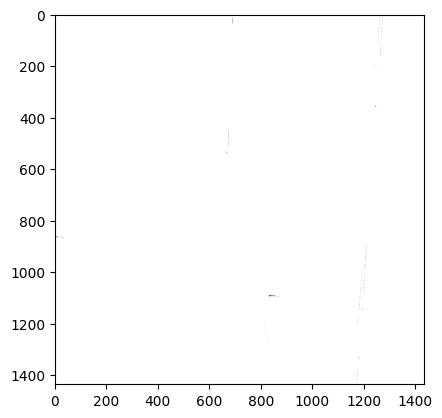

In [ ]:
from grid_manager import GridManager
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time
from trainer.model import PREDICT_GRID_INDICES


grid_manager = GridManager("Bydgoszcz-Polska.city_grid", data_dir="grids/with-is-residential")
metadata = grid_manager.get_metadata()

assert metadata.third_dimension_size == 3, "You have an outdated version of GridManager. Consider downloading grid files again to get all data..."

fragment_row, fragment_col = 2500, 2500
fragment_height, fragment_width = 1500, 1500

segment_h, segment_w = metadata.segment_h, metadata.segment_w
being_predicted = GridManager(
    f"test_{time.time()}.city_grid",
    fragment_height, fragment_width,
    0,0,
    metadata.grid_density,
    segment_h, segment_w,
    data_dir="grids/evaluation",
    third_dimension_size=metadata.third_dimension_size
)
# read_arbitrary_fragment does not take care of memory size - if there are some problems - just use smaller fragment
displayed = grid_manager.read_arbitrary_fragment(fragment_row, fragment_col, fragment_height, fragment_width)
print(f"displayed: {displayed.shape}")

being_predicted.write_arbitrary_fragment(
    grid_manager.read_arbitrary_fragment(fragment_row, fragment_col, fragment_height, fragment_width),
    0, 0
) # for instance some segment in the middle

result = model.predict(being_predicted)
img = result.read_arbitrary_fragment(
    0, 0,
    fragment_height - model.get_input_grid_surplus(),
    fragment_width - model.get_input_grid_surplus()
)[:, :, PREDICT_GRID_INDICES.IS_STREET]

print(f"DEBUG: img.max(): {img.max()}")

struct_el = np.ones((3,3))
dilated = cv2.dilate(img, struct_el, iterations=3)
plt.gray()
plt.imshow(dilated)

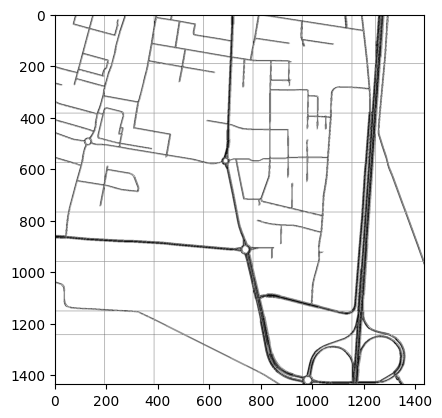

In [3]:
plt.imshow(img)

displayed: (3000, 3000, 3)


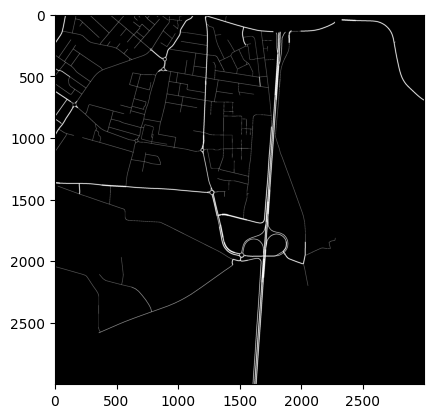

In [9]:
fragment_row, fragment_col = 2000, 2000
fragment_height, fragment_width = 3000, 3000

segment_h, segment_w = metadata.segment_h, metadata.segment_w

# read_arbitrary_fragment does not take care of memory size - if there are some problems - just use smaller fragment
displayed = grid_manager.read_arbitrary_fragment(fragment_row, fragment_col, fragment_height, fragment_width)
print(f"displayed: {displayed.shape}")

plt.gray()
plt.imshow(displayed[:, :, 0], cmap="gray")

## Examples of modules usages


### Download mesh and get grid from OSM


In [ ]:
from scraper.data_loader import DataLoader
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [ ]:
# IMPORTANT!! - dataloader checks, if the file already exists
from scraper.data_loader import DataLoader

cityname = "Kraków"

loader = DataLoader(1)

grid_manager = loader.load_city_grid(cityname, cityname + ".dat")
# loader.add_elevation_to_grid(grid_manager)
loader.add_residential_to_grid(grid_manager)

#### Display downloaded grid (dilated to be better visible)


In [ ]:
from grid_manager import GridManager
import matplotlib.pyplot as plt
import cv2
import numpy as np

grid_manager = GridManager("Tychy.dat", data_dir="grids")
img = grid_manager.read_segment(2,0)[:5000, :5000, 0]

struct_el = np.ones((3,3))
dilated = cv2.dilate(img, struct_el, iterations=3)
plt.gray()
plt.imshow(dilated)

#### Adding is residential tests


In [ ]:
# IMPORTANT!! - dataloader checks, if the file already exists
from scraper.data_loader import DataLoader

cityname = "Tychy"

loader = DataLoader(1)

grid_manager = loader.load_city_grid(cityname, cityname + ".dat")
# loader.add_elevation_to_grid(grid_manager)
loader.add_residential_to_grid(grid_manager)


In [ ]:
from grid_manager import GridManager
from scraper.rasterizer import Rasterizer 
import matplotlib.pyplot as plt
import math

grid_manager = GridManager("Toruń.dat")
meta = grid_manager.get_metadata()
segments_rows = math.ceil(meta.rows_number / meta.segment_h)
segments_cols = math.ceil(meta.columns_number / meta.segment_w)


rasterizer = Rasterizer()
fig, axes = plt.subplots(segments_rows, segments_cols)
fig.set_size_inches((16, 16))
axes = axes.flatten()
axes_index = 0

for row_idx in range(segments_rows):
    for col_idx in range(segments_cols):
        segment = grid_manager.read_segment(row_idx, col_idx)

        axes[axes_index].imshow(segment[:, :, 2], cmap="gray")
        axes[axes_index].set_title(f"Segment_rows: {row_idx}, segment_cols: {col_idx}")
        axes_index += 1

In [ ]:
from grid_manager import GridManager
from scraper.rasterizer import Rasterizer 
import matplotlib.pyplot as plt
import math

grid_manager = GridManager("Toruń.dat")
meta = grid_manager.get_metadata()
segments_rows = math.ceil(meta.rows_number / meta.segment_h)
segments_cols = math.ceil(meta.columns_number / meta.segment_w)


rasterizer = Rasterizer()
fig, axes = plt.subplots(segments_rows, segments_cols)
fig.set_size_inches((16, 16))
axes = axes.flatten()
axes_index = 0

for row_idx in range(segments_rows):
    for col_idx in range(segments_cols):
        segment = grid_manager.read_segment(row_idx, col_idx)

        axes[axes_index].imshow(segment[:, :, 0], cmap="gray")
        axes[axes_index].set_title(f"Segment_rows: {row_idx}, segment_cols: {col_idx}")
        axes_index += 1


In [ ]:
from grid_manager import GridManager

grid_manager = GridManager("Tychy.dat")
img = grid_manager.read_segment(1,1)[:2000, :2000, 0]

fig, axs = plt.subplots(2, 2, figsize=(10,5))
fig.suptitle("Obrazki dróg (zdylatowane, żeby było lepiej widać)")

imgs = [
    [grid_manager.read_segment(0,0)[3000:, 3000:, 0], grid_manager.read_segment(0,1)[3000:, :2000, 0]],
    [grid_manager.read_segment(1,0)[:2000, 3000:, 0], grid_manager.read_segment(1,1)[:2000, :2000, 0]]
]

dilated_imgs = []

struct_el = np.ones((3,3))

for imgs_row in imgs:
    target_row = []
    dilated_imgs.append(target_row)
    for img in imgs_row:
        target_row.append(cv2.dilate(img, struct_el, iterations=3))

plt.gray()
axs[0,0].imshow(dilated_imgs[0][0])
axs[0,1].imshow(dilated_imgs[0][1])
axs[1,0].imshow(dilated_imgs[1][0])
axs[1,1].imshow(dilated_imgs[1][1])

In [ ]:
from scraper.grid_builder import GridBuilder
import math
from scraper.rasterizer import Rasterizer
import matplotlib.pyplot as plt

city = "Tychy, Polska"
builder = GridBuilder()

gdf_edges = builder.get_city_roads(city)

rasterizer = Rasterizer()

grid_2d = rasterizer.get_rasterize_roads(gdf_edges, 1, is_residential=False)
plt.imshow(grid_2d, cmap="gray")
plt.title(f"City: {city}")

In [ ]:
from scraper.grid_builder import GridBuilder
import math
from scraper.rasterizer import Rasterizer
import matplotlib.pyplot as plt
import geopandas as gpd

city = "Kraków"
builder = GridBuilder()
grid_density = 1
segment_h = 5000
segment_w = 5000
data_dir = "grids"

gdf_edges = builder.get_city_roads(city)
min_x, min_y, max_x, max_y = gdf_edges.total_bounds

columns_number = math.ceil((max_x - min_x) / grid_density)
rows_number = math.ceil((max_y - min_y) / grid_density)

segment_rows = math.ceil((rows_number) / segment_h)
segment_cols = math.ceil((columns_number) / segment_h)

# grid_manager = GridManager(file_name, rows_number=int(rows_number), columns_number=int(columns_number),
#                             grid_density=grid_density, segment_h=segment_h, segment_w=segment_w,
#                             data_dir=data_dir, upper_left_longitude=min_x, upper_left_latitude=max_y)
print(f"Height: {int(rows_number)}, Width: {int(columns_number)}, rows: {segment_rows}, cols: {segment_cols}")

rasterizer = Rasterizer()
fig, axes = plt.subplots(segment_rows, segment_cols)
fig.set_size_inches((16, 16))
axes = axes.flatten()
axes_index = 0
# single_row_gdf = gdf_edges.sample(1)

# grid_2d = rasterizer.rasterize_segment_from_indexes(gdf_edges=single_row_gdf, indexes=(0, 0), is_residential=False
#                                                             size_h=segment_h, size_w=segment_w,
#                                                             pixel_size=grid_density)
# print(grid_2d.shape)
# plt.imshow(grid_2d, cmap="gray")

for i in range(segment_rows):
    for j in range(segment_cols):
        grid_2d = rasterizer.rasterize_segment_from_indexes(gdf_edges=gdf_edges, indexes=(i, j), is_residential=False,
                                                            size_h=segment_h, size_w=segment_w,
                                                            pixel_size=grid_density)
        axes[axes_index].imshow(grid_2d, cmap="gray")
        axes[axes_index].set_title(f"Segment_rows: {i}, segment_cols: {j}")
        axes_index += 1

### Data management


In [ ]:
from grid_manager import GridManager
import numpy as np

filename = "przyklad1.dat"

src_man = GridManager(filename, 2000, 2000, 0.0, 0.0, 1, 3, 3, data_dir="grids")

# a = np.zeros((2000, 2000, 2), dtype=np.float64)
is_street = np.array([
    [1, 2, 3, 4, 5, 6],
    [11, 12, 13, 14, 15, 16],
    [21, 22, 23, 24, 25, 26],
    [31, 32, 33, 34, 35, 36],
    [41, 42, 43, 44, 45, 46],
    [51, 52, 53, 54, 55, 56],
])
a = np.zeros((is_street.shape[0], is_street.shape[1], 3))
a[:,:, 0] = is_street

for x in range(2):
    for y in range(2):
        src_man.write_segment(a[y * 3: (y + 1) * 3, x*3:(x + 1) * 3], y, x)


src_man.write_segment(a[:2,:3, :] + 1, 666, 0)
src_man.write_segment(a[:3,:2, :] + 2, 0, 666)

man = src_man.deep_copy()

print(f"1: {man.read_segment(0, 0)[:, :, 0]}")
print(f"2: {man.read_segment(0, 1)[:, :, 0]}")
print(f"3: {man.read_segment(1, 0)[:, :, 0]}")
print(f"4: {man.read_segment(1, 1)[:, :, 0]}")
print(f"5: {man.read_segment(666, 666)[:, :, 0]}")

print(man.get_metadata())

man.delete()


### Streets discovery


In [ ]:
import matplotlib.pyplot as plt

def show_crossroads(img_height, img_width, conflictless_crossroads, conflicting_crossroads):
    fig, axs = plt.subplots(  max(2, len(conflictless_crossroads), len(conflicting_crossroads)), 6, figsize=(10,5))
    axs[0, 0].set_title("conflictless")
    axs[0, 1].set_title("junctions")
    axs[0, 2].set_title("conflicts")
    axs[0, 3].set_title("conflicting")
    axs[0, 4].set_title("junctions")
    axs[0, 5].set_title("conflicts")


    for i in range(len(conflictless_crossroads)):
        crossroad = conflictless_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.points:
            crossroad_image[point] = 1

        axs[i, 0].imshow(crossroad_image)

    for i in range(len(conflictless_crossroads)):
        crossroad = conflictless_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for street in crossroad.street_junctions.keys():
            crossroad_image[crossroad.street_junctions[street]] = 1

        axs[i, 1].imshow(crossroad_image)

    for i in range(len(conflictless_crossroads)):
        crossroad = conflictless_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.conflicting_points:
            crossroad_image[point] = 1

        axs[i, 2].imshow(crossroad_image)

    for i in range(len(conflicting_crossroads)):
        crossroad = conflicting_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.points:
            crossroad_image[point] = 1

        axs[i, 3].imshow(crossroad_image)

    for i in range(len(conflicting_crossroads)):
        crossroad = conflicting_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for street in crossroad.street_junctions.keys():
            crossroad_image[crossroad.street_junctions[street]] = 1

        axs[i, 4].imshow(crossroad_image)

    for i in range(len(conflicting_crossroads)):
        crossroad = conflicting_crossroads[i]

        crossroad_image = np.zeros((img_height, img_width))
        for point in crossroad.conflicting_points:
            crossroad_image[point] = 1

        axs[i, 5].imshow(crossroad_image)


In [ ]:
import matplotlib.pyplot as plt

def show_streets(img_height, img_width, conflictless_streets, conflicting_streets):
    fig, axs = plt.subplots(  max(2, len(conflictless_streets), len(conflicting_streets)), 4, figsize=(10,8))
    axs[0, 0].set_title("conflictless")
    axs[0, 1].set_title("conflicts")
    axs[0, 2].set_title("conflicting")
    axs[0, 3].set_title("conflicts")


    for i in range(len(conflictless_streets)):
        street = conflictless_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.linestring:
            street_image[point] = 1

        axs[i, 0].imshow(street_image)
    
    for i in range(len(conflictless_streets)):
        street = conflictless_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.conflicts:
            street_image[point] = 1

        axs[i, 1].imshow(street_image)

    for i in range(len(conflicting_streets)):
        street = conflicting_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.linestring:
            street_image[point] = 1

        axs[i, 2].imshow(street_image)
    
    for i in range(len(conflicting_streets)):
        street = conflicting_streets[i]

        street_image = np.zeros((img_height, img_width))
        for point in street.conflicts:
            street_image[point] = 1

        axs[i, 3].imshow(street_image)


#### Diamond


In [ ]:
import numpy as np
from skimage.morphology import skeletonize
from graph_remaker.morphological_remaker import discover_streets
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("test_images/diamond.png", cv2.IMREAD_GRAYSCALE)
plt.gray()
bin_image = image > 0
# plt.imshow(bin_image * 255)

processed_image = bin_image[:, :, np.newaxis]
processed_image = np.concatenate((processed_image, np.zeros(processed_image.shape)), axis=2)

conflictless_crossroads, conflicting_crossroads, conflictless_streets, conflicting_streets = discover_streets(processed_image)

height, width = image.shape
plt.imshow(image)

In [ ]:
show_crossroads(height, width, conflictless_crossroads, conflicting_crossroads)

In [ ]:
show_streets(height, width, conflictless_streets, conflicting_streets)

#### Conflicting crossroad and dead-end


In [ ]:
import numpy as np
from skimage.morphology import skeletonize
from graph_remaker.morphological_remaker import discover_streets
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("test_images/crossroad_conflict_deadend.png", cv2.IMREAD_GRAYSCALE)
plt.gray()
bin_image = image > 0
# plt.imshow(bin_image * 255)

processed_image = bin_image[:, :, np.newaxis]
processed_image = np.concatenate((processed_image, np.zeros(processed_image.shape)), axis=2)

conflictless_crossroads, conflicting_crossroads, conflictless_streets, conflicting_streets = discover_streets(processed_image)

height, width = image.shape
plt.imshow(image)

In [ ]:
show_crossroads(width, height, conflictless_crossroads, conflicting_crossroads)

In [ ]:
show_streets(width, height, conflictless_streets, conflicting_streets)

### Model training


##### Use the whole VRAM


In [ ]:
from trainer.clipping_model import tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, False)
        tf.config.set_logical_device_configuration(
            gpus[0],
            [tf.config.LogicalDeviceConfiguration(memory_limit=4000)] # Limit to 4000 MB of VRAM - TODO: adjust based on your GPU
        )
    except RuntimeError as e:
        print(e)

##### Create batch sequence of clippings that are the candidates for a model and print the shape of the input


In [ ]:
from trainer.clipping_sequence import ClippingBatchSequence # not used anymore in the project - only for visualisation
from trainer.batch_sequence import BatchSequence            # not used anymore in the project - only for visualisation

batchSeq = ClippingBatchSequence(           # Define a clipping batch sequence
            BatchSequence(                      # Define a batch sequence
                files=list(["Tychy.dat"]),          # list of files to use
                batch_size=1,                       # not important here
                cut_sizes=[(512, 512)],             # sizes of cuttings to make from the grid
            ),
            clipping_size=512,                  # size of the clipping (input to the model)
            input_grid_surplus=64,              # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
        )

X, Y = batchSeq[0]          # get the first batch
print("Shape of the input batch: ", X.shape)              # print the shape of the input batch

##### Display example clipping (X and y) - `WARNING: you may need to run the above code up to approx. 3-5 times in order to get an image below, other than a void one`


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 10))

axs[0].imshow(X[0, :, :, 0], cmap='grey')
axs[1].imshow(Y["is_street"][0, :, :, 0], cmap='grey')

print("X min/max:", X[0, :, :, 0].min(), X[0, :, :, 0].max())
print("Y min/max:", Y["is_street"][0, :, :, 0].min(), Y["is_street"][0, :, :, 0].max())

##### Show available GPUs


In [ ]:
from tensorflow.python.client import device_lib
import tensorflow as tf

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

##### Define a model and then cities for the trainer (e.g. Tychy) as the files list


In [ ]:
from trainer.clipping_model import ClipModels       # Import ClipModels Enum

print("Possible models:")
for model in ClipModels:
    print(f"- {model.name}: {model.value}")

In [ ]:
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer

model = ClippingModel(      # Define the model
    ClipModels.BASE,            # choose a model from ClipModels Enum (run the cell above to see possible models)
    clipping_size=512,          # size of the clipping (input to the model)
    clipping_surplus=64,        # surplus around the clipping (model gives an output smaller than input, so surplus is needed)
    path="model_test_16_01"     # where to save the model
)
trainer = Trainer(          # Initialize the trainer with the model and data files
    model=model,                # the model defined above
    files=[                     # list of data files to use for training
        "Tychy.dat",
        # "Kraków.dat"
    ]
)

##### Run fitting which created the above batch sequence and trains the model

`random_fit_from_files(self, epochs: int = 100, steps_per_epoch=1000, batch_size=32)`


In [ ]:
trainer.random_fit_from_files(  # Train the model with random data from files
    epochs=1,                       # number of epochs to train
    steps_per_epoch=10,             # number of steps per epoch
    batch_size=32                   # size of each training batch
)

##### Other models etc.

You may need to run "Use the whole VRAM" cell before them (separately and probably after the kernel restart)


#### UNET


In [ ]:
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = ClippingModel(
    ClipModels.UNET,
    clipping_size=512,
    clipping_surplus=64,
    path="model_test_13_01_13_22"
)
trainer = Trainer(
    model=model,
    files=[
        "Tychy.dat",
        "Kraków.dat"
    ]
)
# Na mojej laptopowej RTX 3050 Ti 4GB, batch_size=8 nie poradził sobie z pamięcią po 4 minutach.
# Zmieniłem batch_size na 2 i działa - 44 sekundy na poniższym przykładzie
# UPDATE: Zmieniłem na 4, działa dobrze
# - trochę ponad minuta po ustawieniu (w wyższej komórce) memory_limit=4000
trainer.random_fit_from_files(1, 10, batch_size=4)

#### AlexInspired


In [ ]:
from trainer.clipping_model import ClipModels, ClippingModel, tf
from trainer.trainer import Trainer

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = ClippingModel(
    ClipModels.ALEX_INSPIRED,
    clipping_size=256,
    clipping_surplus=32,
    path="model_test_13_01_13_22"
)
trainer = Trainer(
    model=model,
    files=[
        "Tychy.dat",
        "Kraków.dat"
    ]
)

# u mnie zajęło 41 minut i 1.1 sekundy
trainer.random_fit_from_files(1, 10, batch_size=4)

### upper algorithm


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import os
import cv2
import numpy as np
import math
from grid_manager import GridManager, GRID_INDICES
from graph_remaker.memory_wise import process_large_grid

# 1. GENEROWANIE SZTUCZNEGO OBRAZU
H, W = 1000, 1000
SEG_SIZE = 200
TEMP_GRID_FILE = "square_test.dat"


print(f"Generowanie obrazu {W}x{H}...")
img = np.zeros((H, W), dtype=np.uint8)

# Rysujemy KWADRAT (linie prostopadłe do osi)
# Współrzędne: (150, 150) do (850, 850)
# Linie będą przecinać granice segmentów (które są co 200px) idealnie prosto.
cv2.rectangle(img, (150, 150), (850, 850), 255, thickness=10)

# Dodajmy Krzyż w środku (żeby przetestować skrzyżowania typu "4-way")
cv2.line(img, (500, 150), (500, 850), 255, thickness=10) # Pion
cv2.line(img, (150, 500), (850, 500), 255, thickness=10) # Poziom

print("Obraz wygenerowany.")

# 2. ZAPIS DO PLIKU
if os.path.exists(os.path.join("grids", TEMP_GRID_FILE)):
    os.remove(os.path.join("grids", TEMP_GRID_FILE))

gm = GridManager(TEMP_GRID_FILE, H, W,
                 upper_left_longitude=0.0, upper_left_latitude=0.0,
                 grid_density=1.0,
                 segment_h=SEG_SIZE, segment_w=SEG_SIZE)

img_binary = (img > 0).astype(np.float32)

rows_n = math.ceil(H / SEG_SIZE)
cols_n = math.ceil(W / SEG_SIZE)

print(f"Dzielenie na {rows_n}x{cols_n} segmentów...")

for r in range(rows_n):
    for c in range(cols_n):
        y_start = r * SEG_SIZE
        x_start = c * SEG_SIZE
        y_end = min(y_start + SEG_SIZE, H)
        x_end = min(x_start + SEG_SIZE, W)

        chunk = img_binary[y_start:y_end, x_start:x_end]
        gm.write_segment(chunk, r, c)

print("Dane zapisane. Uruchamiam memory_wise...")

# 3. URUCHOMIENIE
try:
    # Używamy tej wersji memory_wise, którą masz teraz (z patchem i snappingiem)
    graph = process_large_grid(TEMP_GRID_FILE)

    # 4. WIZUALIZACJA
    print(f"\n--- WYNIK ---")
    print(f"Węzły: {len(graph.nodes)}")
    print(f"Krawędzie: {len(graph.edges)}")

    plt.figure(figsize=(12, 6))

    # Lewa: Obraz
    plt.subplot(1, 2, 1)
    plt.title(f"Idealny Kwadrat (Linie proste)")
    plt.imshow(img, cmap='gray')

    # Siatka cięcia
    for y in range(0, H, SEG_SIZE):
        plt.axhline(y, color='yellow', linestyle='--', alpha=0.3)
    for x in range(0, W, SEG_SIZE):
        plt.axvline(x, color='yellow', linestyle='--', alpha=0.3)

    # Prawa: Graf
    plt.subplot(1, 2, 2)
    plt.title("Zrekonstruowany Graf")

    if len(graph.nodes) > 0:
        pos = {n: (data['x'], data['y']) for n, data in graph.nodes(data=True)}

        nx.draw(graph, pos,
                node_size=20,
                node_color='red',
                edge_color='cyan',
                width=2,
                with_labels=False,
                arrows=False)
        plt.axis('equal')
        plt.gca().invert_yaxis() # Żeby góra była na górze
    else:
        plt.text(0.5, 0.5, "BRAK WYNIKÓW", ha='center', color='red', fontsize=15)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"CRITICAL ERROR: {e}")
    import traceback
    traceback.print_exc()